##### CIS435: Practical Data Science with Machine Learning
##### Assignment 2: Classification Case Study
## Breast Cancer Prediction of Malignant or Benign
Author: Mark Cody
Date: February 14, 2021

Purpose: Use Breast Cancer Wisconsin (Diagnostic) Data Set and classification machine learning algorithms build models to predict whether the cancer is benign or malignant. Four models are used:
- Logistics Regression
- Decision Tree
- Naive Bayes
- SVM Classifier 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/Users/markcody/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Data Understanding and Quality
We begin with reading the dataset from the file bdata.csv and examining its characteristics and quality. 

In [2]:
df = pd.read_csv('bdata.csv')

In [3]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [5]:
df.shape

(569, 23)

In [6]:
df.isnull().any()

id                        False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
radius_se                 False
texture_se                False
perimeter_se              False
area_se                   False
smoothness_se             False
compactness_se            False
concavity_se              False
concave points_se         False
symmetry_se               False
fractal_dimension_se      False
radius_worst              False
diagnosis                 False
dtype: bool

In [7]:
df.duplicated().value_counts() 
#Confirm the presence of duplicate rows.

False    569
dtype: int64

In [8]:
df.info() #Confirm the datatypes in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [9]:
df.describe() #Display basic descriptive statistics for each column. 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,1.000000


#### Exploratory Data Analysis (EDA)

In [10]:
#EDA a stand-alone report with sweetviz.
#Upon running this cell the report appears in a new browser tab.
import sweetviz as sv
data_report = sv.analyze(df)
data_report.show_html('Breast_Cancer_Data_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Breast_Cancer_Data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Machine Learning Models
We begin by splitting the dataset into independent and dependent variables, where diagnosis is the dependent variable.

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1)

### Logistic Regression

In [13]:
lr = LogisticRegression().fit(X_train, y_train)

In [14]:
lrtrn_score = lr.score(X_train, y_train)
lrtst_score = lr.score(X_test, y_test)
print("Training set accuracy: {:.4f}".format(lrtrn_score))
print("Test set accuracy: {:.4f}".format(lrtst_score))
lrfi = lr.coef_.T
print("Feature importances:\n{}".format(lrfi))

Training set accuracy: 0.6315
Test set accuracy: 0.6154
Feature importances:
[[-4.24881646e-10]
 [-1.99658930e-16]
 [-5.81022120e-16]
 [-1.06792375e-15]
 [ 1.53641338e-14]
 [-3.84678677e-18]
 [ 5.28150375e-19]
 [ 5.89081744e-18]
 [ 3.13002883e-18]
 [-7.22022659e-18]
 [-3.11563769e-18]
 [ 9.33395193e-18]
 [-6.06539521e-17]
 [ 6.88677462e-17]
 [ 2.79534903e-15]
 [-3.81227048e-19]
 [-2.77807739e-19]
 [-8.40911684e-20]
 [-1.02696622e-19]
 [-1.05177851e-18]
 [-1.56382953e-19]
 [-8.08002129e-17]]


In [15]:
# Confusion Matrix
lr_pred = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
lrcm = confusion_matrix(y_test, lr_pred)
print(lrcm)

[[88  0]
 [55  0]]


In [16]:
# Precision/Recall
from sklearn.metrics import classification_report
lrpr = classification_report(y_test, lr_pred) 
print(lrpr)

             precision    recall  f1-score   support

          0       0.62      1.00      0.76        88
          1       0.00      0.00      0.00        55

avg / total       0.38      0.62      0.47       143



/Users/markcody/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


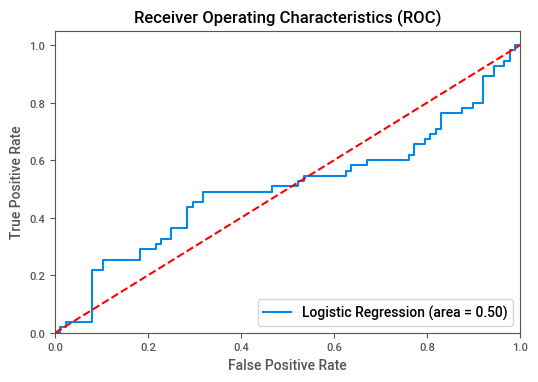

In [17]:
# Receiver Operating Characteristics (ROC)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, 
                                 lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, 
         label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc="lower right")
plt.savefig('lr_ROC')
plt.show()

In [18]:
# Area Under the Curve (AUC)
lrauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % lrauc)

AUC: 0.505


### Decision Tree

In [19]:
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
trtrn_score = tree.score(X_train, y_train)
trtst_score = tree.score(X_test, y_test)
print("Accuracy on training set: {:.4f}".format(trtrn_score))
print("Accuracy on test set: {:.4f}".format(trtst_score))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9371


In [21]:
#Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” 
#The feature importances always sum to 1
trfi = tree.feature_importances_
print("Feature importances:\n{}".format(trfi))

Feature importances:
[0.         0.         0.09048083 0.0134492  0.         0.
 0.01004487 0.         0.09080774 0.01128714 0.         0.00491875
 0.         0.01729183 0.         0.         0.         0.0201738
 0.         0.         0.00756517 0.73398067]


In [22]:
#Confusion Matrix
tr_pred = tree.predict(X_test)
trcm = confusion_matrix(y_test, tr_pred)
print(trcm)

[[83  5]
 [ 4 51]]


In [23]:
# Precision/Recall
trcr = classification_report(y_test, tr_pred) 
print(trcr)

             precision    recall  f1-score   support

          0       0.95      0.94      0.95        88
          1       0.91      0.93      0.92        55

avg / total       0.94      0.94      0.94       143



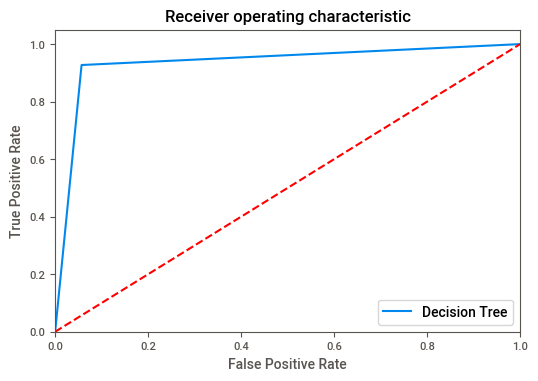

In [24]:
# Receiver Operating Characteristics (ROCs)
tree_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, 
                                 tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('tree_ROC')
plt.show()

In [25]:
# Area Under the Curve (AUC)
trauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % trauc)

AUC: 0.935


### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [27]:
gnbtrn_score = gnb.score(X_train, y_train)
gnbtst_score = gnb.score(X_test, y_test)
print("Accuracy on training set: {:.4f}".format(gnbtrn_score))
print("Accuracy on test set: {:.4f}".format(gnbtst_score))

Accuracy on training set: 0.6291
Accuracy on test set: 0.6154


In [28]:
# Confusion Matrix
nb_pred = gnb.predict(X_test)
nbcm = confusion_matrix(y_test, nb_pred)
print(nbcm)

[[88  0]
 [55  0]]


In [29]:
# Precision/Recall
nbcr = classification_report(y_test, nb_pred) 
print(nbcr)

             precision    recall  f1-score   support

          0       0.62      1.00      0.76        88
          1       0.00      0.00      0.00        55

avg / total       0.38      0.62      0.47       143



/Users/markcody/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


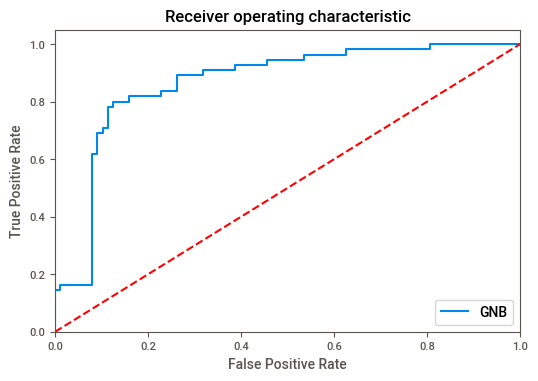

In [30]:
# Receiver Operating Characteristics (ROC)
GNB_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, 
                                 gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

In [31]:
# Area Under the Curve (AUC)
nbauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % nbauc)

AUC: 0.867


### SVM Classifier

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [33]:
# SVM requires all the features to vary on a similar scale. 
# We will need to rescale our data that all the features 
# are approximately on the same scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
svctrn_score = svc.score(X_train_scaled, y_train)
svctst_score = svc.score(X_test_scaled, y_test)
print("Accuracy on training set: {:.2f}".format(svctrn_score))
print("Accuracy on test set: {:.2f}".format(svctst_score))

Accuracy on training set: 0.92
Accuracy on test set: 0.93


In [37]:
# Confusion Matrix
svc_pred = svc.predict(X_test_scaled)
svcm = confusion_matrix(y_test, svc_pred)
print(svcm)

[[87  1]
 [ 9 46]]


In [39]:
# Precision/Recall
svcr = classification_report(y_test, svc_pred) 
print(svcr)

             precision    recall  f1-score   support

          0       0.91      0.99      0.95        88
          1       0.98      0.84      0.90        55

avg / total       0.93      0.93      0.93       143



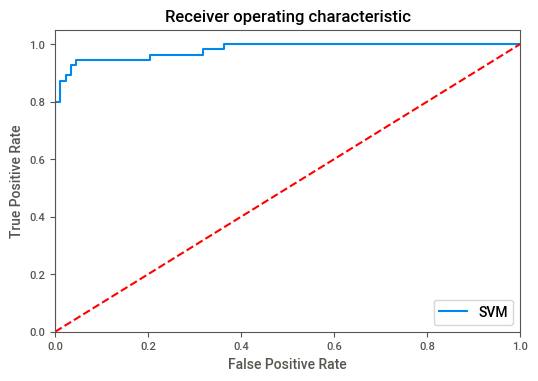

In [40]:
svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, 
                                 svc.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [41]:
svcauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % svcauc)

AUC: 0.981


In [58]:
index = ['Logistic Regression',
         'Decision Tree',
         'Naive Bayes',
         'Support Vector Machine']
results = pd.DataFrame({
        'Train Accuracy':[lrtrn_score,trtrn_score,gnbtrn_score,svctrn_score],
        'Test Accuracy':[lrtst_score,trtst_score,gnbtst_score,svctst_score],
        'Precision':[.38,.94,.38,.93],
        'Recall':[.62,.94,.62,.93],
        'F1':[.47,.94,.47,.93],
        'AUC':[lrauc,trauc,nbauc,svcauc]
}, index = index)
results

,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.631455,0.615385,0.38,0.62,0.47,0.504545
Decision Tree,1.000000,0.937063,0.94,0.94,0.94,0.935227
Naive Bayes,0.629108,0.615385,0.38,0.62,0.47,0.866529
Support Vector Machine,0.917840,0.930070,0.93,0.93,0.93,0.980579


88